# 서포트벡터머신(분류  모델)
## 13.5 서포트벡터머신(분류 모델)

- 범주를 나눠줄 수 있는 최적의 구분선을 찾아내 관측치의 범주를 예측해주는 역사 깊은 모델이다.

- 이진 분류에만 사용하다는 단점이 있지만, 비선형 데이터에서 높은 정확도를 보이고, 다른 모델들 보다 과적합 되는 경향이 적어서 인기가 많은 분석 방법이다.

- 각 집단을 구분해주는 결정경계선이 존재하고, 그 사이에 존재하는 공간을 마진이라고 하며, SVM은 마진을 최대화 하도록 만들어 졌음.

- 마진과 맞닿아서 결정경계선의 위치와 각도를 정해줄 수 있는 기준이 되는 관측치를 서포트 백터라고 한다. (결정경계선을 지지해주고 있기 때문) 최적의 결정 경계선을 찾기 위해서는 독립변수가 k라고 했을 떄 최소 k+1개의 서포트 백터가 필요

- SVM은 서포트백터만으로 범주의 구분 기준인 결정경계선을 정하기 때문에 학습 효율이 높은것이다.

- 기계학습에서 거리를 통해 분류나 회귀모델을 만들 때는 반드시 데이터 정규화나 표준화를 해줘야한다.

- 변수가 3개로 늘어나면 결정경계선은 평면이 되고 그 이상으로 차원이 증가하면 그림으로 표현할 수 없는 초평면이 결정 경계선이 된다. 따라서 SVM은 MMH, 즉 최대 마진 초평면을 찾아 범주를 분리하는 분류 방법이라고 할 수 있다 .

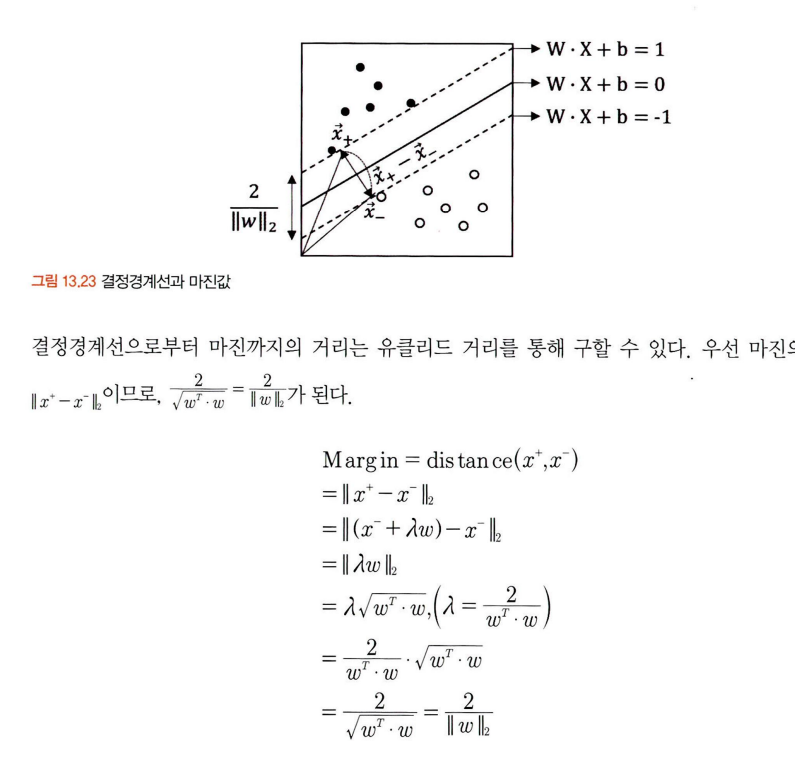
모르겠음


- 이상치를 허용하지 않는다 = 이상치를 포함해서 두 범주를 정확하게 나눠준다.
 -> 과적합 발생 할 수 있음. 왜? 훈련데이터에서는 정확도가 높을 수 있겠지만 이상치 근처에 다른 범주가 많다면 새로운 데이터를 분류하기엔 정확도가 떨어지는 과적합 발생
 -> 따라서 어느 정도 이상치를 허용해줄 필요가 있다 .

- 두 범주를 정확하게 나누지는 않지만, 마진을 최대화 하여 과적합을 방지해주는 것이 소프트 마진이고, 이상치를 허용하지 않는 것이 하드 마진이라고함.

- 이를 조정해주는 매개변수가 C, Gamma가 사용
    - C
        1. C값을 낮게 설정하면 이상치들이 있을 가능성을 높게 잡아서 소프트 마진과 같은 결정 경계선을 만들어낸다.
        2. C값을 높게 설정하면 하드마진과 같은 결정경계선을 만들어 낸다.  
    - Gamma 
        1. Gamma값은 관측치가 영향력을 행사하는 거리를 조정해주는 것임. 
        2. 값이 클수록 영향력의 거리는 짧아지게 되고 , 값이 작을수록 영향력의 거리는 길어지게 된다. 
    
    
    
    > C값은 이상치에 대한 민감도를 조정해 주는 것이기 떄문에 결정경계선의 유연함을 조정해주는 느낌이라면, 
    Gamma값은 커질수록 각각의 관측치에 대한 결정경계선 범위가 작아져서 결국 여러개의 결정경계선이 생기게 된다.


- 소프트마진을 높게 설정하더라도 결정경계선을 만들기 힘든경우에는 커널 기법 사용

- 커널기법 : 기존의 데이터를 고차원 공간으로 확장하여 새로운 결정경계선을 만들어 내는 방법
    
    ->종류 : Polynomial 커널, Sigmoid 커널, 가우시안 RBF 등등


### 13.5.1 서포트벡터머신 실습

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# 데이터 불러오기
df = pd.read_excel('Raisin_Dataset.xlsx')
df.head()
### 각 건포도의 품종과 길이 정보, 이심률 등의 정보가 있다 .
#### Area는 명목형인거같음.
# 독립변수 정규화

## 독립변수, 종속변수 분리

x = df.drop(['Area','Class'],axis=1)

y = df[['Class']]


## 데이터 정규화
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,0.280714,0.314376,0.767872,0.255504,0.831422,0.271791
1,0.234638,0.284945,0.738636,0.208864,0.667854,0.241842
2,0.280741,0.351778,0.733009,0.268084,0.565754,0.283594
3,0.078935,0.186620,0.548194,0.084089,0.701809,0.108284
4,0.164011,0.422064,0.350968,0.219472,0.906315,0.218493
...,...,...,...,...,...,...
895,0.264945,0.298733,0.763836,0.236831,0.634192,0.245347
896,0.278757,0.331595,0.749761,0.256905,0.563259,0.286325
897,0.267056,0.445044,0.608017,0.317858,0.792897,0.324126
898,0.324902,0.316915,0.810259,0.283698,0.612254,0.307635


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
## 학습셋과 테스트셋 분리
x_train , x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.3,shuffle=32)

print(len(x_train))
print(len(x_test))


630
270


c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


##### SVM 파라미터 
커널(kernel): SVM은 데이터를 고차원 공간으로 매핑하여 비선형 문제를 해결할 수 있습니다. 이를 위해 커널 함수를 사용합니다. 가장 일반적으로 사용되는 커널은 선형 커널, 다항식 커널, 가우시안(RBF) 커널 등이 있습니다.

C 매개변수: C는 SVM 모델의 정규화 파라미터로, 마진 오차와 분류 오차 사이의 균형을 조절합니다. C 값이 크면 분류 오차를 줄이려고 하며, 작으면 마진을 늘리려고 합니다.


gamma 매개변수 (RBF 커널에만 해당): gamma는 가우시안(RBF) 커널의 폭을 제어하는 매개변수로, 값이 작을수록 데이터 포인트 간의 거리가 멀어지고, 값이 클수록 거리가 가까워집니다.

degree 매개변수 (다항식 커널에만 해당): 다항식 커널에서 사용되며, 다항식의 차수를 지정합니다.

coef0 매개변수 (다항식 및 시그모이드 커널에만 해당): 커널 함수의 자유 매개변수 중 하나로, 다항식 및 시그모이드 커널의 모양을 제어합니다.

In [5]:
from sklearn.svm import SVC

In [6]:
## 선형 SVM 모델 성능 확인

svm_model = SVC(kernel = 'linear',degree =3,gamma='auto',C=10,max_iter=1000)

svm_model.fit(x_train,y_train)

print(svm_model.score(x_train,y_train))
print(svm_model.score(x_test,y_test))



0.8761904761904762
0.8518518518518519


c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
## SVM C값에 따른 모델 성능 확인
scores = []
for c in [*range(1,31)]:
    svc =SVC(kernel='rbf',C=c,max_iter=1000)
    c_model = svc.fit(x_train,y_train)
    train_score = c_model.score(x_train,y_train)
    test_score = c_model.score(x_test,y_test)
    print('rgf SVM : C:{},train score :{:2f}, test score :{:2f} '.format(c,train_score,test_score))
    scores.append([train_score,test_score])


c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConve

rgf SVM : C:1,train score :0.880952, test score :0.859259 
rgf SVM : C:2,train score :0.880952, test score :0.859259 
rgf SVM : C:3,train score :0.882540, test score :0.851852 
rgf SVM : C:4,train score :0.882540, test score :0.855556 
rgf SVM : C:5,train score :0.879365, test score :0.855556 
rgf SVM : C:6,train score :0.879365, test score :0.859259 
rgf SVM : C:7,train score :0.876190, test score :0.855556 
rgf SVM : C:8,train score :0.873016, test score :0.848148 
rgf SVM : C:9,train score :0.871429, test score :0.848148 
rgf SVM : C:10,train score :0.871429, test score :0.844444 
rgf SVM : C:11,train score :0.873016, test score :0.848148 
rgf SVM : C:12,train score :0.873016, test score :0.851852 
rgf SVM : C:13,train score :0.871429, test score :0.855556 
rgf SVM : C:14,train score :0.871429, test score :0.855556 
rgf SVM : C:15,train score :0.874603, test score :0.855556 
rgf SVM : C:16,train score :0.874603, test score :0.855556 
rgf SVM : C:17,train score :0.874603, test score 

c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConve

rgf SVM : C:22,train score :0.874603, test score :0.859259 
rgf SVM : C:23,train score :0.873016, test score :0.859259 
rgf SVM : C:24,train score :0.873016, test score :0.855556 
rgf SVM : C:25,train score :0.876190, test score :0.859259 
rgf SVM : C:26,train score :0.876190, test score :0.855556 
rgf SVM : C:27,train score :0.876190, test score :0.855556 
rgf SVM : C:28,train score :0.876190, test score :0.855556 
rgf SVM : C:29,train score :0.876190, test score :0.855556 
rgf SVM : C:30,train score :0.874603, test score :0.855556 


c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Co